In [ ]:
%pip install numpy tqdm opencv-python imutils

In [2]:
%pip install tensorflow pillow opencv-python tqdm imutils matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow # type: ignore
from PIL import Image # type: ignore
import glob # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, save_img, img_to_array # type: ignore
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input # type: ignore
from tensorflow.keras.preprocessing import image# type: ignore
from tensorflow.keras import backend as K # type: ignore
from tensorflow.keras.models import Model, Sequential # type: ignore
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization,Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation,GlobalAveragePooling2D # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping # type: ignore
from tensorflow.keras.applications.imagenet_utils import preprocess_input # type: ignore
from sklearn.metrics import classification_report,accuracy_score # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.utils import shuffle # type: ignore
import numpy as np # type: ignore
from tqdm import tqdm # type: ignore
from sklearn.utils import shuffle # type: ignore
import cv2 # type: ignore
import os # type: ignore
import shutil # type: ignore
import itertools # type: ignore
import imutils # type: ignore
from sklearn.model_selection import StratifiedKFold # type: ignore
import random # type: ignore
from tensorflow.keras import layers # type: ignore

In [ ]:
def crop_img(img):
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)
	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
	return new_img
	

In [ ]:
if __name__ == "__main__":
	training = r"C:\Users\RAKSHA\Downloads\Training"
	testing = r"C:\Users\RAKSHA\Downloads\Testing"
	training_dir = os.listdir(training)
	testing_dir = os.listdir(testing)
	IMG_SIZE = 256

	for dir in training_dir:
		save_path = 'brain_tumour/cropped/Training/'+ dir
		path = os.path.join(training,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)
	
	for dir in testing_dir:
		save_path = 'brain_tumour/cropped/Testing/'+ dir
		path = os.path.join(testing,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

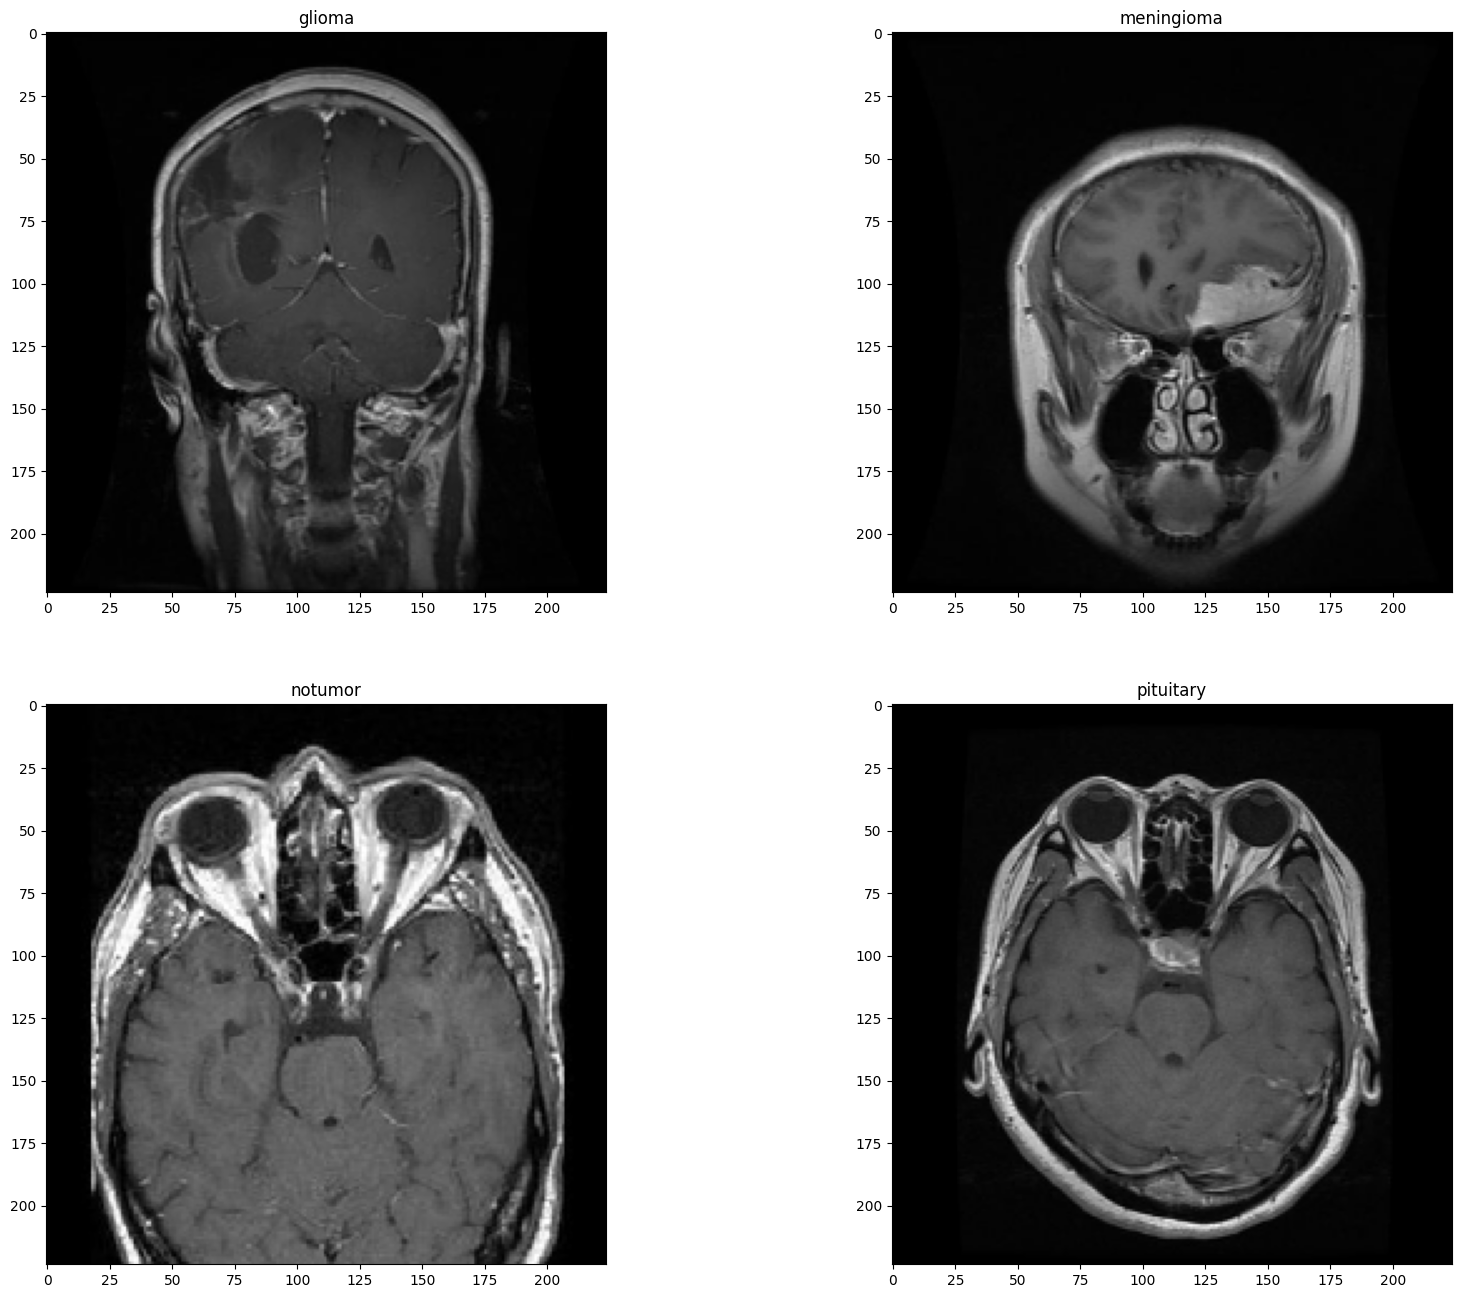

In [ ]:
data_dir = r"C:\Users\RAKSHA\Downloads\Training"
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-gl_0010.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(categories[i])

In [ ]:
def crop_img(img):

	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
	
	return new_img

In [ ]:
img = cv2.imread(r"C:\Users\vijay\Downloads\brain_tumor_dataset\Training\meningioma\Tr-me_0589.jpg")
img = cv2.resize(
            img,
            dsize=(224,224),
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS]

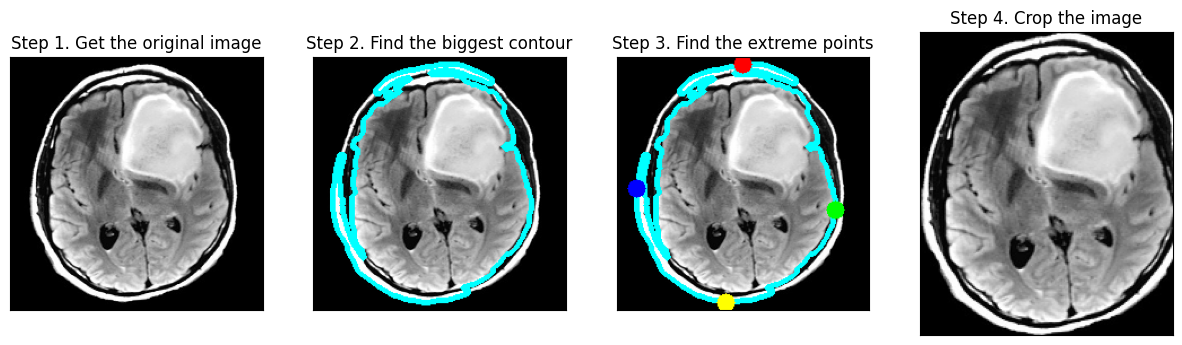

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()
     

In [ ]:

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
x_train = []
y_train  = [] 
x_test = [] 
y_test = [] 

image_size = 200


for label in labels:
    trainPath = os.path.join(r"\Users\vijay\Downloads\brain_tumor_dataset\cropped\Training",label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file),0) 
        image = cv2.bilateralFilter(image, 2, 50, 50) 
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE) 
        image = cv2.resize(image, (image_size, image_size)) 
        x_train.append(image)
        y_train.append(labels.index(label))
    
    testPath = os.path.join(r"C:\Users\vijay\Downloads\brain_tumor_dataset\cropped\Testing",label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file),0)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))


x_train = np.array(x_train) / 255.0 
x_test = np.array(x_test) / 255.0

print(x_train.shape)
print(x_test.shape)

100%|██████████| 300/300 [00:03<00:00, 94.74it/s] 


(5712, 200, 200, 3)
(1311, 200, 200, 3)


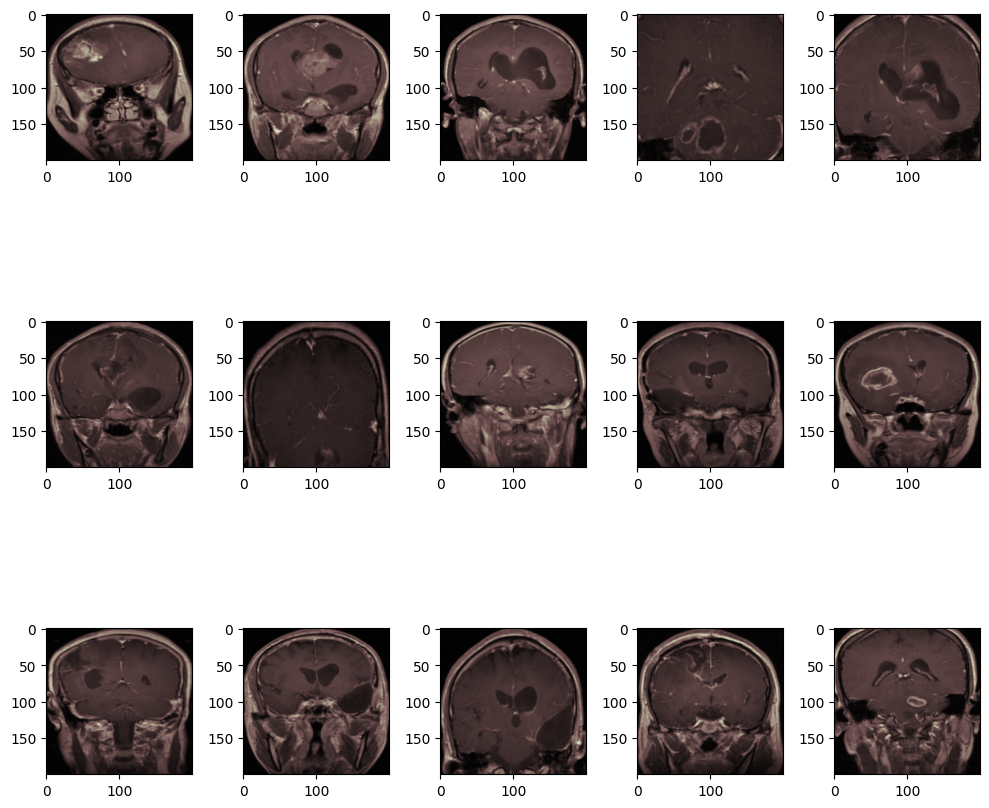

In [11]:
images = [x_train[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

In [ ]:

x_train, y_train = shuffle(x_train,y_train, random_state=42) 

y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) 

print(x_val.shape)

(1143, 200, 200, 3)


Augmented images saved in 'C:\Users\vijay\Downloads\preview_2'


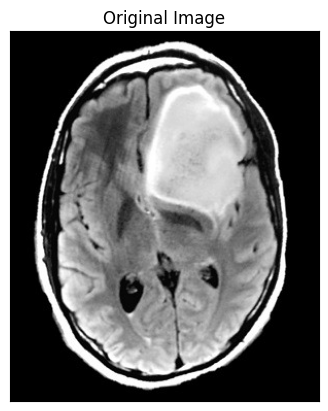

Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_1175.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_1360.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_1604.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_2050.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_2122.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_228.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_2534.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_2601.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_2719.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_276.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_2920.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_3326.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_3668.jpg
Loading image: C:\Users\vijay\Downloads\preview_2\aug_img_0_4111.jpg
Loading image: C:\Users\vijay\Downlo

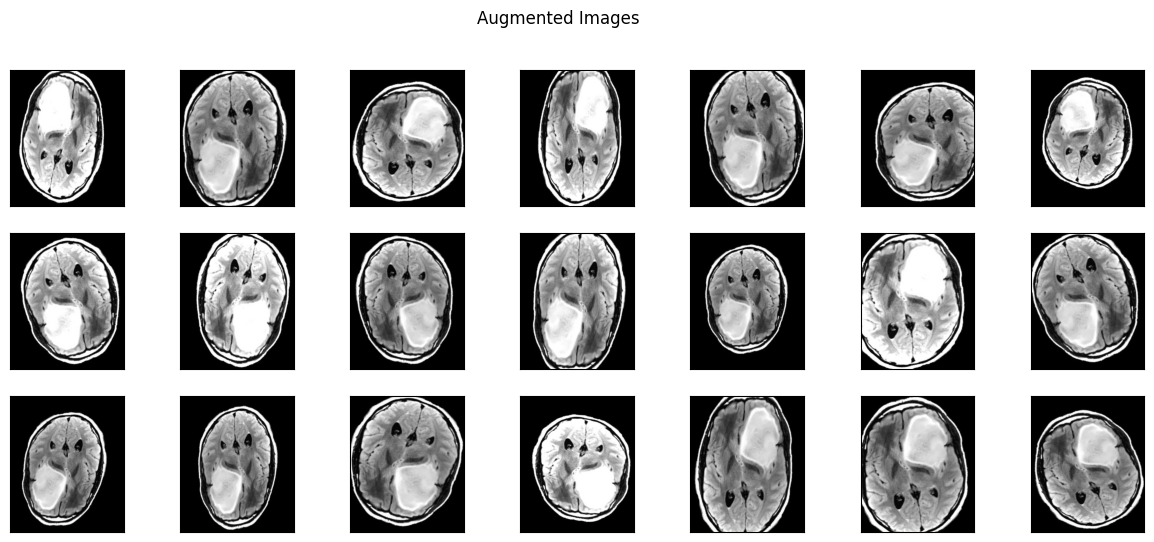

In [ ]:
import os
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
folder_name = r"C:\Users\vijay\Downloads\preview_2"
os.makedirs(folder_name, exist_ok=True)
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore
img_path =  r"C:\Users\vijay\Downloads\brain_tumor_dataset\Training\meningioma\Tr-me_0589.jpg" 
img = load_img(img_path)
x = img_to_array(img)
if len(x.shape) == 2: 
    x = x.reshape((1,) + x.shape + (1,))
else:
    x = x.reshape((1,) + x.shape)

demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.2,
    shear_range=0.05,
    brightness_range=[0.5, 1.5], 
    horizontal_flip=True,
    vertical_flip=True
)

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir=folder_name, save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:  
        break

print(f"Augmented images saved in '{folder_name}'")

plt.imshow(x[0].astype('uint8'))  
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1

for img_name in os.listdir(folder_name):
    img_path = os.path.join(folder_name, img_name)
    print(f"Loading image: {img_path}") 

    img = cv2.imread(img_path)  
    if img is None:
        print(f"Error loading image: {img_name}")
        continue  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 7, i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    
    i += 1
    if i > 3 * 7:  
        break

plt.suptitle('Augmented Images')
plt.show()


In [ ]:
datagen = ImageDataGenerator(
     rotation_range=10,                        
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)
datagen.fit(x_train)

In [ ]:

from tensorflow.keras.applications.resnet import ResNet50 # type: ignore
IMG_SIZE=(200,200)
conv_base = ResNet50(
    include_top=False,
    input_shape=IMG_SIZE + (3,),
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

In [16]:
model = conv_base.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.4)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= conv_base.input, outputs= model)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau # type: ignore

callbacks = [
    ModelCheckpoint('model_weights.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='min', min_lr=1e-6)
]


In [ ]:
train_len = len(x_train)
val_len = len(x_val)
print("-----------Training Data length-----------------")
print(train_len)
print("-----------Validation Data length-----------------")
print(val_len)

-----------Training Data length-----------------
4569
-----------Validation Data length-----------------
1143


In [19]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),validation_data = (x_val,y_val),epochs = 50,callbacks = callbacks)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 0.3255 - accuracy: 0.8774
Epoch 1: val_loss improved from inf to 1.61513, saving model to model_weights.keras
72/72 [==============================] - 540s 7s/step - loss: 0.3255 - accuracy: 0.8774 - val_loss: 1.6151 - val_accuracy: 0.2283 - lr: 1.0000e-04
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9705
Epoch 2: val_loss did not improve from 1.61513
72/72 [==============================] - 513s 7s/step - loss: 0.0879 - accuracy: 0.9705 - val_loss: 5.4239 - val_accuracy: 0.2336 - lr: 1.0000e-04
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9814
Epoch 3: val_loss did not improve from 1.61513

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
72/72 [==============================] - 519s 7s/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 5.6138 - val_accuracy: 0.2336 - lr: 1.0000e-04
Epoch 4/50
72/72 [===

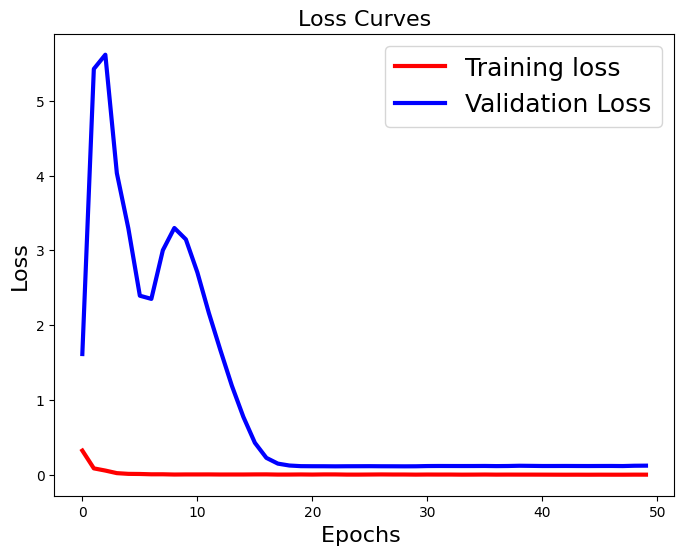

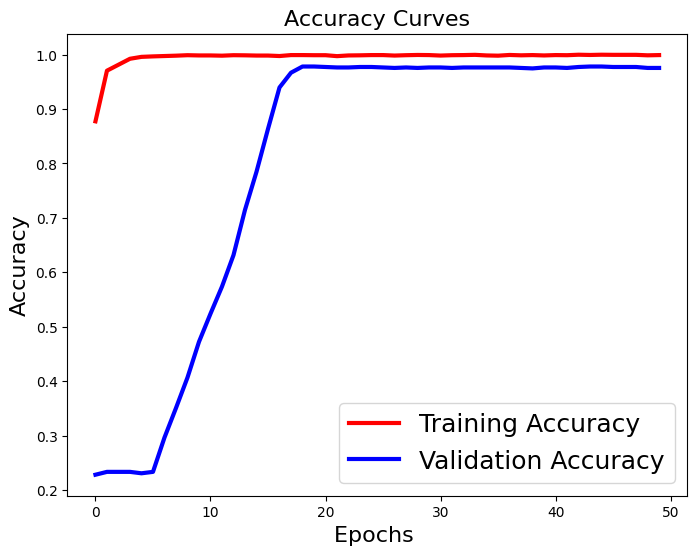

In [ ]:

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

In [ ]:
from tensorflow.keras.models import load_model # type: ignore
model = load_model('model_weights.keras')
model.save('modelres50.h5')
model = load_model('modelres50.h5')


In [24]:
%pip install seaborn


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.6 MB 9.1 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.6 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.6 MB 8.4 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.6 MB 8.6 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.6 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.6 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns # type: ignore
predicted_classes = np.argmax(model.predict(x_test), axis = 1)
print(classification_report(np.argmax(y_test,axis=1), predicted_classes,target_names=['glioma','meningioma','no_tumor','pituitary']))

41/41 [==============================] - 33s 786ms/step
              precision    recall  f1-score   support

      glioma       0.98      0.98      0.98       300
  meningioma       0.98      0.97      0.97       306
    no_tumor       0.99      0.99      0.99       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



164/164 [==============================] - 44s 267ms/step


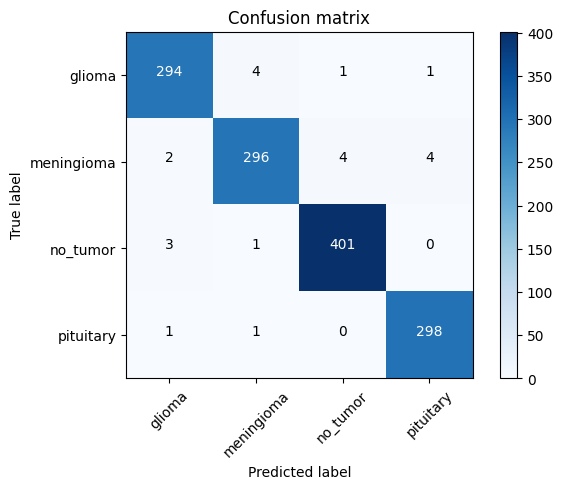

In [ ]:
import itertools
pred_Y = model.predict(x_test, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names=['glioma','meningioma','no_tumor','pituitary']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
Y_pred = model.predict(x_test, batch_size=8) 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
rounded_labels=np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(4)) 

82/82 [==============================] - 34s 415ms/step


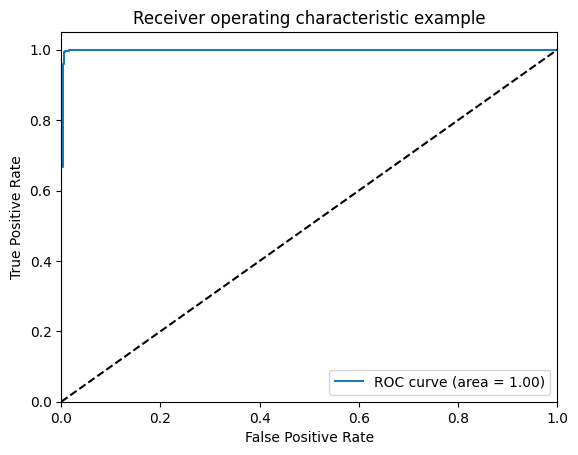

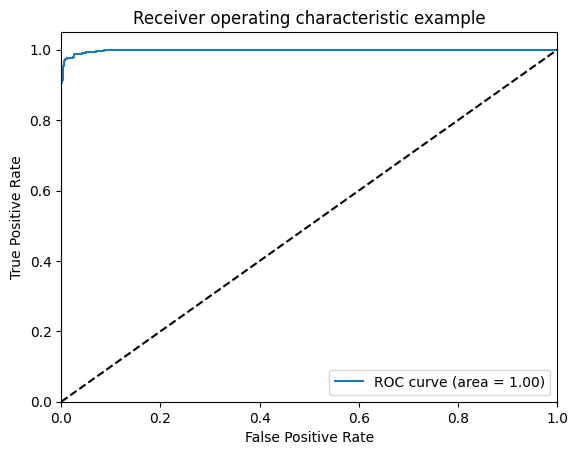

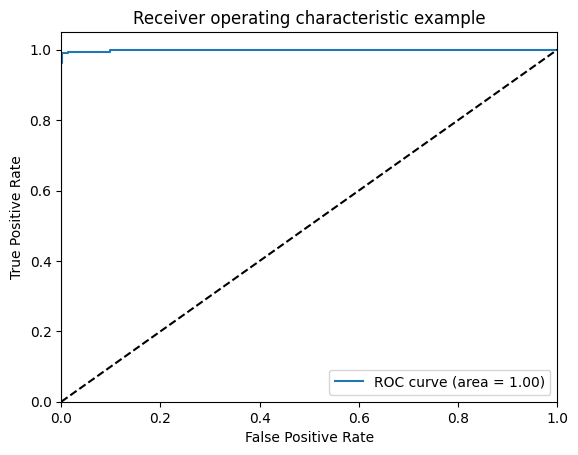

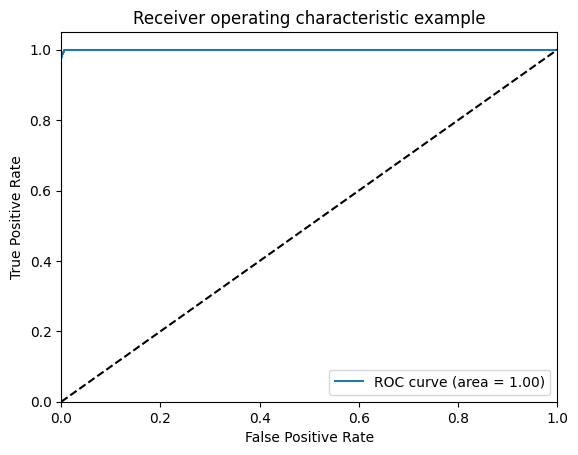

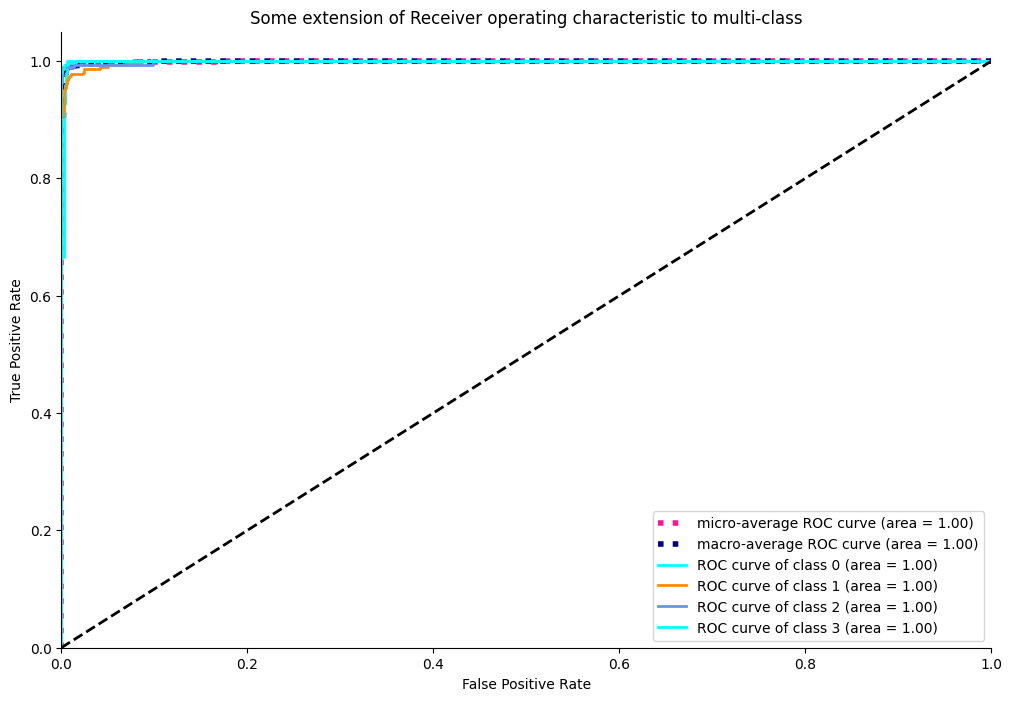

In [ ]:
import seaborn as sns # type: ignore
import pandas as pd # type: ignore
from sklearn.datasets import make_classification # type: ignore
from sklearn.preprocessing import label_binarize # type: ignore
from numpy import interp 

from itertools import cycle
import pandas as pd # type: ignore
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt # type: ignore
from sklearn.metrics import roc_curve, auc # type: ignore


y_test = np.array(y_test)

n_classes = 4

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

41/41 [==============================] - 49s 1s/step


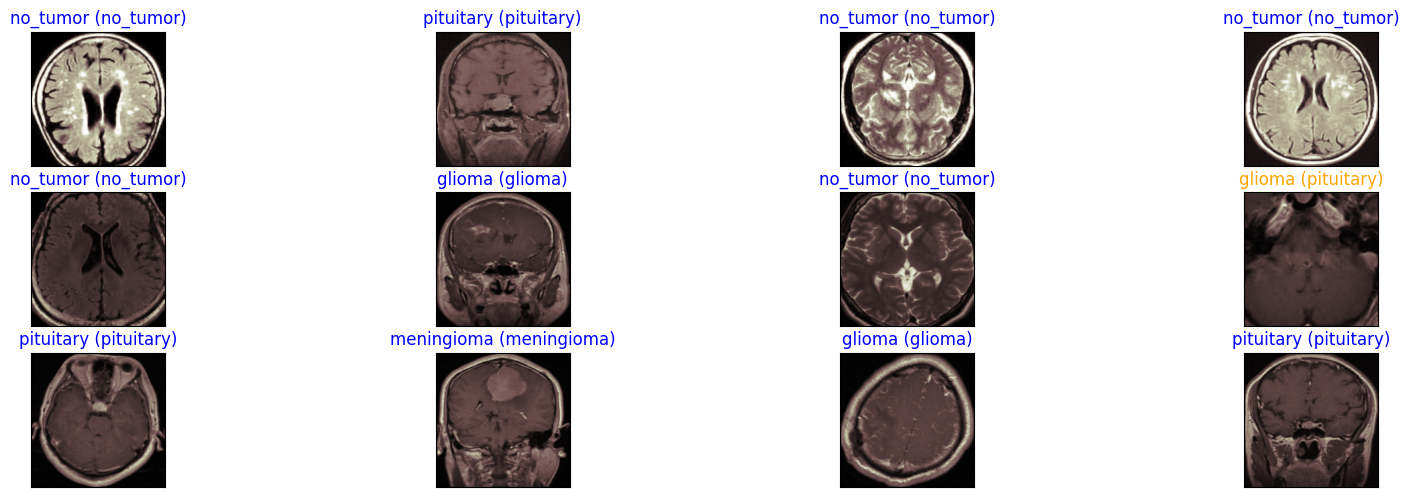

In [ ]:

y_hat = model.predict(x_test)

target_labels = ['glioma','meningioma','no_tumor','pituitary']
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))

In [ ]:
import tensorflow as tf # type: ignore
import numpy as np
import os
from tensorflow.keras.preprocessing import image # type: ignore

x_test2_path = r"C:\Users\vijay\Downloads\brain_tumor_dataset\no"

image_size = (224, 224)  
x_test2 = []
for img_name in os.listdir(x_test2_path):
    img_path = os.path.join(x_test2_path, img_name)
    img = image.load_img(img_path, target_size=image_size)  
    img_array = image.img_to_array(img)  
    img_array = img_array / 255.0  
    x_test2.append(img_array)

x_test2 = np.array(x_test2)  


In [ ]:

y_hat2 = model.predict(x_test2)

predicted_classes = np.argmax(y_hat2, axis=1)

target_labels = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

predicted_labels = [target_labels[idx] for idx in predicted_classes]

for i, label in enumerate(predicted_labels):
    print(f"Image {i+1}: Predicted as {label}")


14/14 [==============================] - 11s 796ms/step
Image 1: Predicted as no_tumor
Image 2: Predicted as no_tumor
Image 3: Predicted as no_tumor
Image 4: Predicted as no_tumor
Image 5: Predicted as no_tumor
Image 6: Predicted as no_tumor
Image 7: Predicted as no_tumor
Image 8: Predicted as no_tumor
Image 9: Predicted as no_tumor
Image 10: Predicted as no_tumor
Image 11: Predicted as no_tumor
Image 12: Predicted as no_tumor
Image 13: Predicted as pituitary
Image 14: Predicted as no_tumor
Image 15: Predicted as no_tumor
Image 16: Predicted as no_tumor
Image 17: Predicted as glioma
Image 18: Predicted as no_tumor
Image 19: Predicted as no_tumor
Image 20: Predicted as no_tumor
Image 21: Predicted as no_tumor
Image 22: Predicted as no_tumor
Image 23: Predicted as no_tumor
Image 24: Predicted as no_tumor
Image 25: Predicted as no_tumor
Image 26: Predicted as no_tumor
Image 27: Predicted as no_tumor
Image 28: Predicted as no_tumor
Image 29: Predicted as no_tumor
Image 30: Predicted as no_